In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from subprocess import check_output

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## My team and I were curious to find out what were the level of CO₂ in the Atmosphere. This led us to Berkley Earth who gathered and combined data from NASA’s GISTEMP, UK’s HadCrut. To bolster my dataset, I also included data from the NOAA’s Mauna Loa Observatory to do this Exploratory Data Analysis (EDA).

In [0]:
CO2_df = pd.read_csv('/content/drive/My Drive/data/archive.csv')
temp_by_city = pd.read_csv('/content/drive/My Drive/data/ClimateChange/GlobalLandTemperaturesByCity.csv')
temp_by_country = pd.read_csv('/content/drive/My Drive/data/ClimateChange/TemperaturesByCountry.csv')
temp_by_major_city = pd.read_csv('/content/drive/My Drive/data/ClimateChange/TemperaturesByMajorCity.csv')
temp_by_state = pd.read_csv('/content/drive/My Drive/data/ClimateChange/TemperaturesByState.csv')
global_temp = pd.read_csv('/content/drive/My Drive/data/ClimateChange/GlobalTemperatures.csv')

# **What are the issue will I be addressing on this EDA?**

## As stated above, this dataset will only be addressing CO2 in the atmosphere and associated temperature changes across the globe. Below is an explanation of the data and how it was collected:

In [4]:
CO2_df.head()

,Year,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958,1,1958.0411,NaN,NaN,NaN,NaN
1,1958,2,1958.1260,NaN,NaN,NaN,NaN
2,1958,3,1958.2027,315.69,314.42,316.18,314.89
3,1958,4,1958.2877,317.45,315.15,317.30,314.98
4,1958,5,1958.3699,317.50,314.73,317.83,315.06


In [5]:
temp_by_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [6]:
temp_by_country.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [7]:
temp_by_major_city.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [8]:
temp_by_state.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [9]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


# **What generally causes this kind of issue?**


## Earth’s temperature depends on the balance between energy entering and leaving the planet’s system. When incoming energy from the sun is absorbed by the Earth system, Earth warms. When the sun’s energy is reflected back into space, Earth avoids warming. When absorbed energy is released back into space, Earth cools. Many factors, both natural and human, can cause changes in Earth’s energy balance, including:
* Variations in the sun’s energy reaching Earth
* Changes in the reflectivity of Earth’s atmosphere and surface
* Changes in the greenhouse effect, which affects the amount of heat retained by the Earth’s atmosphere

# **Why is this relevant and how Climate Change will affect me?**


## Earth’s climate is changing faster than at any point in the history of modern civilization, primarily as a result of human activities. Climate change effects have been experienced across every region in the world and in sectors that are extremely essential to modern societies such as human health, agriculture and food security, water supply, transportation, energy, ecosystems, and others — and are expected to become increasingly disruptive throughout the years.


### The Fourth National Climate Assessment (NCA4), developed by the U.S. Global Change Research Program (USGCRP), is a state-of-the-science synthesis of climate knowledge, impacts, and trends across U.S. regions and sectors to inform decision making and resilience-building activities across the country. It is the most comprehensive and authoritative assessment to date on the state of knowledge of current and future impacts of climate change on society in the United States.

We’ve now covered some of the essentials about climate change, we can move on to what discoveries were made throughout my Exploratory Data Analysis.


Upon importing the data and analyzing the columns and rows in the dataset, we notice that there were some missing data — A few of the rows had empty values (displayed as NaN). A major difference between data found in tutorials and data in the real world is that real-world data is rarely clean and homogeneous. Many interesting datasets will have a certain amount of data missing due to errors, omissions and a variety of other causes. To make matters even more complicated, a lot of different data sources may indicate missing data in different ways — so it was important to remove these values from the dataset because they could lead to wrong predictions or classification in our model.

In [0]:
# Dropping all NaN values 
CO2_df = CO2_df.dropna()
temp_by_city = temp_by_city.dropna()
temp_by_country = temp_by_country.dropna()
temp_by_major_city = temp_by_major_city.dropna()
temp_by_state = temp_by_state.dropna()
global_temp = global_temp.dropna()

## Now that the dataset is clean, we were able to move forward with my analysis. One of the immediate issues that came about was that we needed to modify the dates listed, as the dataset had listed Year-Month-Day and for our first prediction and we only needed the year for this analysis.


In [0]:
# Modify the date format so I could only use the year
def to_year(date):
    """
    returns year from date time
    """
    for i in [date]:
        first = i.split('-')[0]
        return int(first)
 
    
# Applying the date modification and creating a new column 
# in the dataset called year
temp_by_state['year'] = temp_by_state['dt'].apply(to_year)

# Collecting only data of the United States
dfs = temp_by_state[temp_by_state['Country'] == 'United States']

# Collecting the average temperature per year 
dfa = pd.DataFrame()
years = dfs['year'].unique()
for i in years:
    df_avg = dfs[dfs['year'] == i]['AverageTemperature'].mean()
    df_new = (dfs[dfs['year'] == i]).head(1)
    df_new['AverageTemperature'] = df_avg
    dfa = dfa.append(df_new)

## For our first prediction, we selected only the average temperature of each state in the United States over the selected period. We started out with first attempting to understand the data that we are working with via a scatter plot. We wanted to visualize the average temperature of the states in the US that were above and below 9° degrees.

### *A scatter plot is a graph in which the values of two variables are plotted along two axes, the pattern of the resulting points revealing any correlation present*.

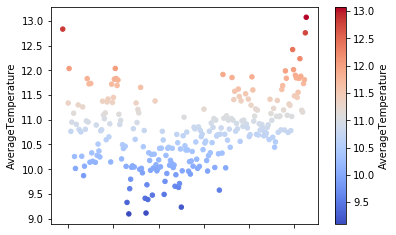

In [12]:
# Average Temperature above 9 degrees
df_nine = dfa[dfa['AverageTemperature'] >= 9]
df_nine.plot.scatter(x='year', y='AverageTemperature', c = 'AverageTemperature', cmap ='coolwarm')

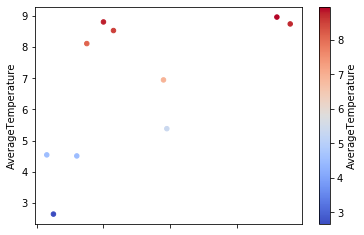

In [13]:
# Average Temperature below 9 degrees
df_nine = dfa[dfa['AverageTemperature'] <= 9]
df_nine.plot.scatter(x='year', y='AverageTemperature', c = 'AverageTemperature', cmap ='coolwarm')

## Our next thought process was to create a new dataframe which would contain the average Carbon Dioxide in the atmosphere per year, then produce a Linear Relationship plot from the data to visually see how much it has changed over the years. For this plot, I utilized a python library called seaborn.




## *Two main functions in seaborn are used to visualize a linear relationship as determined through regression. These functions, regplot() and lmplot() are closely related and share much of their core functionality. It is important to understand the ways they differ, however, so that you can quickly choose the correct tool for a particular job.

### In the simplest invocation, both functions draw a scatterplot of two variables, x, and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.*

In [0]:
new_co2_df = CO2_df

In [0]:
dfc = pd.DataFrame()

# Collecting all of the unique years
years = CO2_df['Year'].unique()

for i in years:
    df_avg = CO2_df[CO2_df['Year'] == i]['Carbon Dioxide (ppm)'].mean()
    df_new = (CO2_df[CO2_df['Year'] == i]).head(1)
    df_new['Carbon Dioxide (ppm)'] = df_avg
    dfc = dfc.append(df_new)
    
# Changing the Year column to year (lowercase)
dfc.rename(index=str, columns={"Year": "year"}, inplace=True)


# Dropping all of the unwanted columns
dfc.drop(['Seasonally Adjusted CO2 (ppm)', 
           'Carbon Dioxide Fit (ppm)', 
           'Seasonally Adjusted CO2 Fit (ppm)',
          'Decimal Date',
          'Month'], inplace=True, axis=1)

In [0]:
dfc = dfc.dropna()

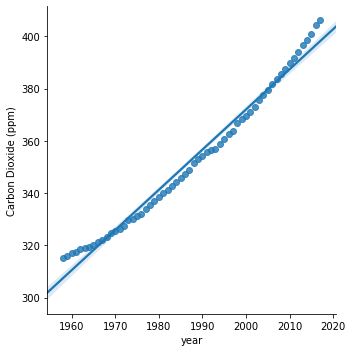

In [17]:
sns.lmplot(x='year', y='Carbon Dioxide (ppm)', data=dfc)

## This plot shows the increase in Carbon Dioxide in the atmosphere over a number of years. Unfortunately, during the 1760s which was when the 1st industrial revolution started our technology wasn’t advanced enough, and it wasn’t until 10 years after the 3rd industrial revolution that our technology has advanced so we could keep track of Carbon Dioxide in the atmosphere.


## As you can see in the plot above, in 2010 we have reached almost 400 parts-per-million (ppm) of Carbon Dioxide globally. After discovering this result, we wanted to check if there were any correlation between the variables that were being studied.


### *Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.*

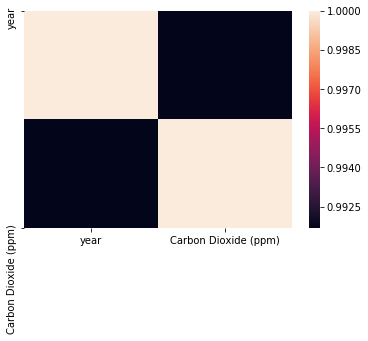

In [18]:
sns.heatmap(dfc.corr())

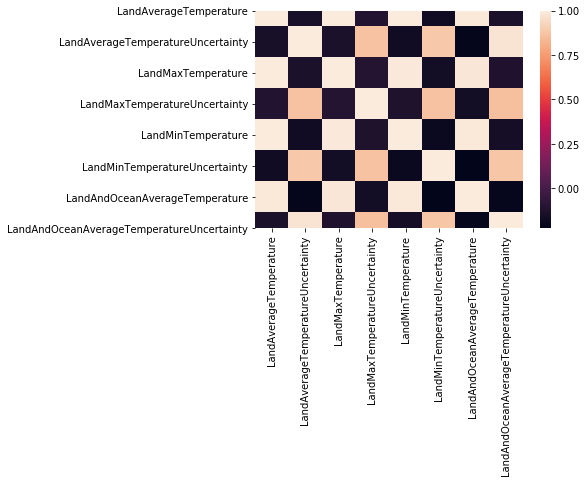

In [19]:
sns.heatmap(global_temp.corr())

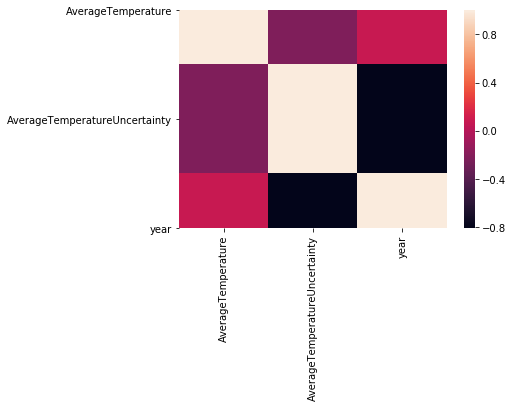

In [20]:
sns.heatmap(temp_by_state.corr())

In [0]:
CO2_df.rename(index=str, columns={"Year": "year"}, inplace=True)

In [0]:
dfsc = pd.merge(dfa, CO2_df, on=['year']).dropna()

dfsc.drop(['Seasonally Adjusted CO2 (ppm)', 
           'Carbon Dioxide Fit (ppm)', 
           'Seasonally Adjusted CO2 Fit (ppm)',
          'Decimal Date',
          'Month'], inplace=True, axis=1)

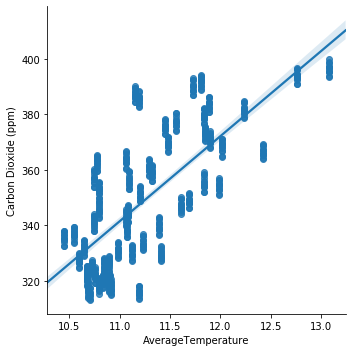

In [25]:
sns.lmplot(x='AverageTemperature', y='Carbon Dioxide (ppm)', data = dfsc)

## After having discovered a few important pieces of information, we were tempted to visualize the average levels of CO₂ in the atmosphere per month. For this visualization, I utilized a python library called plotly, this library allows your plots to be interactive.

In [26]:
import plotly.offline as py
import plotly.graph_objs as go
import datetime as dt

grp1 = CO2_df.groupby(["year"]).mean()["Carbon Dioxide (ppm)"]
trace1 = go.Bar(x=grp1.index, y=grp1.values)
layout = go.Layout(
    title="Average CO<sub>2</sub> Levels in Atmosphere per month",
    yaxis=dict(title="Parts per million (PPM)", range=(300,420)),
    xaxis=dict(title="Year"))
figure = go.Figure(data=[trace1], layout=layout)
py.iplot(figure, filename="co2-ppm-year")

## This plot revealed that in 2017 the average level of CO₂ was **406.07 (ppm)**, which is a major swing compared to the level of CO₂ in 2010. Now, let’s check what does the Seasonal fluctuations of CO₂ levels are.

In [0]:
group2 = CO2_df.groupby(["year", "Month"]).mean()["Carbon Dioxide (ppm)"]
x = [dt.datetime(year=i[0], month=i[1], day=15) for i in group2.index]

# Mean values.
y1 = group2.values

# Rolling window average
y2 = group2.rolling(3, min_periods=1).mean().values

# Exponentially weighted moving average
y3 = group2.ewm(span=3, min_periods=1).mean().values

In [28]:
second_trace = go.Scatter(x=x, y=y1, mode="markers", name="Actual value")
third_trace = go.Scatter(x=x, y=y2, line=dict(color="red"), name="Rolling average")
forth_trace = go.Scatter(x=x, y=y3, line=dict(color="green"), name="EWM average")

default_period = (dt.datetime(2008, 1, 1), dt.datetime(2017,12,1))
default_ppm_range = (380, 410)
layout = go.Layout(
    title="Seasonal fluctations of CO<sub>2</sub> levels in atmosphere",
    yaxis=dict(title="Parts per million (PPM)",range=default_ppm_range),
    xaxis=dict(title="Year", range=default_period))

figure = go.Figure(data=[second_trace, third_trace, forth_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-seasonal")

## As we've mentioned before, all of these data visualizations done with plotly are interactive and allow you to interact with the variables themselves.


## All of these results are extremely insightful and led us to our next step; training a model to create more data-driven insights. After training the model, we visualized and compared the difference between the actual levels of CO₂ and the predicted levels, and the results were disquieting to say the least.


In [29]:
from sklearn import linear_model
from sklearn.model_selection  import train_test_split

x_val = [ (i.year, i.month, i.month ** 2, i.year ** 2) for i in x]
y_val = [ i for i in y1 ] 

x_train, x_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.40, random_state=45)
linearModel = linear_model.LinearRegression().fit(x_train, y_train)
print ("Accuracy: ", linearModel.score(x_test, y_test))

# predicted values
pred_value = linearModel.predict(x_val)

Accuracy:  0.996044541845813


In [30]:
# Defining timeline of years
predicted_years = range(1950, 2055)
predicted_months = range(1, 13)

predicted_x = []
for y in predicted_years:
    for j in predicted_months:
        predicted_x.append([y, j, j ** 2, y ** 2])
        
# Predict values
predicted_y = linearModel.predict(predicted_x)


x_plot = [dt.datetime(i[0], i[1], 15) for i in predicted_x]
fifth_trace = go.Scatter(x=x_plot, y=predicted_y, line=dict(color="red"), name="Predicted value")

period_default = dt.datetime(1956, 1, 1), dt.datetime(2050,12,1)
ppm_range_def = (300, 500)
layout = go.Layout(
    title="Predicted Vs. Actual CO<sub>2</sub> Concentration levels",
    yaxis=dict(title="Parts per million (PPM)", range=ppm_range_def),
    xaxis=dict(title="Year", range=period_default))
figure = go.Figure(data=[second_trace, fifth_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-prediction")

## As you can see in the plot above, I made sure to mark the year 2030. This was the year that the **IPCC reported to the United Nations, that marks the deadline for changing our habits to reduce the levels of CO₂ in the atmosphere before irreversible damage is done**. As you can see in January 2030 the predicted level of CO₂ in the atmosphere will be **437.3 (ppm)**. This is a massive change!

## Let’s now take a look in the state country that had the highest average temperature level in the dataset, and what year was that temperature was recorded.

In [31]:
 # State that had the highest average temperature level
temp_by_state.loc[temp_by_state['AverageTemperature'].idxmax()]

dt                               2012-06-01
AverageTemperature                   36.339
AverageTemperatureUncertainty         0.385
State                                 Delhi
Country                               India
year                                   2012
Name: 116037, dtype: object

In [32]:
# Country that had the highest Average Temperature
# Kuwait (Western Asia)
temp_by_country.loc[temp_by_country['AverageTemperature'].idxmax()]

dt                               2012-07-01
AverageTemperature                   38.842
AverageTemperatureUncertainty         0.464
Country                              Kuwait
Name: 284851, dtype: object

In [33]:
temp_by_state.loc[temp_by_state['AverageTemperatureUncertainty'].idxmax()]

dt                                1768-01-01
AverageTemperature                    -9.102
AverageTemperatureUncertainty         12.646
State                            Kaliningrad
Country                               Russia
year                                    1768
Name: 202908, dtype: object

In [0]:
def mod_year(date):
    """
    returns year from date time
    """
    for i in [date]:
        first = i.split('-')[0]
        return int(first)

In [0]:
def mod_month(date):
    """
    returns month from date time
    """
    for i in [date]:
        second = i.split('-')[1]
        return int(second)

In [0]:
temp_by_country['year'] = temp_by_country['dt'].apply(mod_year)
temp_by_country['month'] = temp_by_country['dt'].apply(mod_month)

In [0]:
country_new_temp_data = pd.merge(temp_by_country, CO2_df, on=['year'])

In [0]:
country_carbon = country_new_temp_data.groupby(["year", "month"]).mean()["Carbon Dioxide (ppm)"]
xx = [dt.datetime(year=i[0], month=i[1], day=15) for i in country_carbon.index]

# Mean values.
yy1 = country_carbon.values

# Rolling window average
yy2 = country_carbon.rolling(3, min_periods=1).mean().values

# Exponentially weighted moving average
yy3 = country_carbon.ewm(span=3, min_periods=1).mean().values

In [0]:
second_country_trace = go.Scatter(x=xx, y=yy1, mode="markers", name="Actual value")
third_country_trace = go.Scatter(x=xx, y=yy2, line=dict(color="red"), name="Rolling average")
forth_country_trace = go.Scatter(x=xx, y=yy3, line=dict(color="green"), name="EWM average")

In [40]:
x_values = [ (i.year, i.month, i.month ** 2, i.year ** 2) for i in x]
y_values = [ i for i in y1 ] 

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.40, random_state=45)
linearModel = linear_model.LinearRegression().fit(x_train, y_train)
print ("Accuracy: ", linearModel.score(x_test, y_test))

# predicted values
pred_value = linearModel.predict(x_values)

Accuracy:  0.996044541845813


In [0]:
# country_new_temp_data['Country'].unique()
df1 = country_new_temp_data.groupby(['Country'])

In [0]:
df2= df1.apply(lambda x: x.sort_values(["Carbon Dioxide (ppm)"]))

In [43]:
df3=df2.reset_index(drop=True)
df3.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,year,month,Month,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm)
0,1958-10-01,13.910,0.320,Afghanistan,1958,10,9,1958.7068,313.21,316.06,312.48,315.35
1,1958-04-01,16.592,0.350,Afghanistan,1958,4,9,1958.7068,313.21,316.06,312.48,315.35
2,1958-06-01,25.091,0.502,Afghanistan,1958,6,9,1958.7068,313.21,316.06,312.48,315.35
3,1958-07-01,27.240,0.363,Afghanistan,1958,7,9,1958.7068,313.21,316.06,312.48,315.35
4,1958-08-01,24.639,0.436,Afghanistan,1958,8,9,1958.7068,313.21,316.06,312.48,315.35


In [44]:
new_predicted_x = []
for y in predicted_years:
    for j in predicted_months:
        new_predicted_x.append([y, j, j ** 2, y ** 2])
        
# Predict values
new_predicted_y = linearModel.predict(new_predicted_x)


new_x_plot = [dt.datetime(i[0], i[1], 15) for i in new_predicted_x]
fifth_new_trace = go.Scatter(x=new_x_plot , y=new_predicted_y, line=dict(color="red"), name="Predicted value")

layout = go.Layout(
    title="Predicted Vs. Actual CO<sub>2</sub> Concentration levels",
    yaxis=dict(title="Parts per million (PPM)", range=ppm_range_def),
    xaxis=dict(title="Year", range=period_default))
figure = go.Figure(data=[second_country_trace, fifth_new_trace], layout=layout)
py.iplot(figure, filename="co2-ppm-prediction")

If by now you haven’t realized that climate change is a real issue and it affects our entire planet, you should re-read this article again, and again, ad nauseam, until you realize that we have to act now! There isn’t a plan B! Earth is our home planet and we must take care of it.

![alt text](https://media.giphy.com/media/cObIzBCAkFxW60ORYj/giphy.gif)

# **How can I contribute to solve this problem?**

## * Unite for bold climate action
## * Use energy wisely — and save money too!
## * Get charged up with renewables
## * Eat for a climate-stable planet
## * Start a climate conversation
## * Green your commute
## * Consume less, waste less, enjoy life more
## * Invest in renewables and divest from fossil fuels
## * Support or join youth-led movements
## * Get politically active and vote